In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv(r'C:\Users\Anuja\Downloads\train_Hr.csv')
test=pd.read_csv(r'C:\Users\Anuja\Music\New folder\test_Hr.csv')

## processing of train data set

In [3]:
train.shape

(54808, 14)

## missing values

In [4]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
train["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [6]:
train["education"].fillna("Below Secondary",inplace=True)

In [7]:
train["education"].isnull().sum()

0

In [8]:
train["previous_year_rating"].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [9]:
train["previous_year_rating"].fillna(2.0,inplace=True)

In [10]:
train["previous_year_rating"].isnull().sum()

0

In [11]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [12]:
train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [13]:
train.shape

(54808, 14)

In [14]:
train.drop(['employee_id'],axis=1,inplace=True)

## Duplicates

In [15]:
train.drop_duplicates(inplace=True)

In [16]:
train.shape

(54688, 13)

## casting 

In [17]:
train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [18]:
train["education"].value_counts()

Bachelor's          36569
Master's & above    14920
Below Secondary      3199
Name: education, dtype: int64

In [19]:
train["department"].value_counts()

Sales & Marketing    16789
Operations           11318
Procurement           7131
Technology            7130
Analytics             5341
Finance               2535
HR                    2413
Legal                 1032
R&D                    999
Name: department, dtype: int64

In [20]:
train["region"].value_counts()

region_2     12311
region_22     6398
region_7      4838
region_15     2799
region_13     2643
region_26     2255
region_31     1930
region_4      1703
region_27     1654
region_16     1465
region_28     1318
region_11     1314
region_23     1174
region_29      992
region_32      943
region_19      873
region_20      846
region_14      827
region_25      817
region_17      796
region_5       765
region_6       689
region_30      655
region_8       654
region_10      648
region_1       610
region_24      507
region_12      498
region_9       418
region_21      411
region_3       346
region_34      291
region_33      269
region_18       31
Name: region, dtype: int64

In [21]:
train["recruitment_channel"].value_counts()

other       30378
sourcing    23169
referred     1141
Name: recruitment_channel, dtype: int64

In [22]:
train["education"].replace({"Bachelor's":1,"Master's & above":2,"Below Secondary":3},inplace=True)

In [23]:
train["department"].replace({"Sales & Marketing":1,"Operations":2,"Technology":3,"Procurement":4,"Analytics":5,"Finance":6,"HR":7,"Legal":8,"R&D":9},inplace=True)

In [24]:
train["region"]=train["region"].str.removeprefix("region_")

In [25]:
train["region"]=train["region"].astype("int64")

In [26]:
train["recruitment_channel"].replace({"other":1,"sourcing":2,"referred":3},inplace=True)

In [27]:
train["gender"].replace({"f":1,"m":2},inplace=True)

In [28]:
train.dtypes

department                int64
region                    int64
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

## data type conversion

In [29]:
train["previous_year_rating"]=train["previous_year_rating"].astype("int64",copy=False)

In [30]:
train.dtypes

department              int64
region                  int64
education               int64
gender                  int64
recruitment_channel     int64
no_of_trainings         int64
age                     int64
previous_year_rating    int64
length_of_service       int64
KPIs_met >80%           int64
awards_won?             int64
avg_training_score      int64
is_promoted             int64
dtype: object

## processing of test data set

## missing value

In [31]:
test.shape

(23490, 13)

In [32]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [33]:
test["education"].value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [34]:
test["education"].fillna("Below Secondary" , inplace=True)

In [35]:
test["previous_year_rating"].value_counts()

3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64

In [36]:
test["previous_year_rating"].fillna(2.0 , inplace=True)

In [37]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [38]:
test.drop_duplicates(inplace=True)

In [39]:
test.drop(['employee_id'],axis=1,inplace=True)

In [40]:
test.shape

(23490, 12)

In [41]:
test.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [42]:
test["department"].unique()

array(['Technology', 'HR', 'Sales & Marketing', 'Procurement', 'Finance',
       'Analytics', 'Operations', 'Legal', 'R&D'], dtype=object)

In [43]:
test["region"].unique()

array(['region_26', 'region_4', 'region_13', 'region_2', 'region_29',
       'region_7', 'region_22', 'region_16', 'region_17', 'region_24',
       'region_11', 'region_27', 'region_9', 'region_20', 'region_34',
       'region_23', 'region_8', 'region_14', 'region_31', 'region_19',
       'region_5', 'region_28', 'region_15', 'region_3', 'region_25',
       'region_12', 'region_21', 'region_30', 'region_10', 'region_33',
       'region_32', 'region_6', 'region_1', 'region_18'], dtype=object)

In [44]:
test["education"].unique()

array(["Bachelor's", "Master's & above", 'Below Secondary'], dtype=object)

In [45]:
test["recruitment_channel"].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [46]:
test["department"].replace({'Technology':1, 'HR':2, 'Sales & Marketing':3, 'Procurement':4, 'Finance':5,
       'Analytics':6, 'Operations':7, 'Legal':8, 'R&D':9},inplace=True)

In [47]:
test["education"].replace({"Bachelor's":1, "Master's & above":2, 'Below Secondary':3},inplace=True)

In [48]:
test["recruitment_channel"].replace({'sourcing':1, 'other':2, 'referred':3},inplace=True)

In [49]:
test["region"]=test["region"].str.removeprefix("region_")

In [50]:
test["region"]=test["region"].astype("int64")

In [51]:
test["gender"].replace({"f":1,"m":2},inplace=True)

In [52]:
test["previous_year_rating"]=train["previous_year_rating"].astype("int64" , copy=False) 

In [53]:
test.dtypes

department                int64
region                    int64
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [54]:
train.skew()

department              0.964154
region                  0.208506
education               1.261161
gender                 -0.884275
recruitment_channel     0.537372
no_of_trainings         3.444288
age                     1.007044
previous_year_rating   -0.138304
length_of_service       1.738682
KPIs_met >80%           0.618966
awards_won?             6.331460
avg_training_score      0.450680
is_promoted             2.969307
dtype: float64

In [55]:
#skew columns =>no_of_trainings ,is_promoted 

array([[<Axes: title={'center': 'department'}>,
        <Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'recruitment_channel'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'previous_year_rating'}>],
       [<Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met >80%'}>,
        <Axes: title={'center': 'awards_won?'}>,
        <Axes: title={'center': 'avg_training_score'}>],
       [<Axes: title={'center': 'is_promoted'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

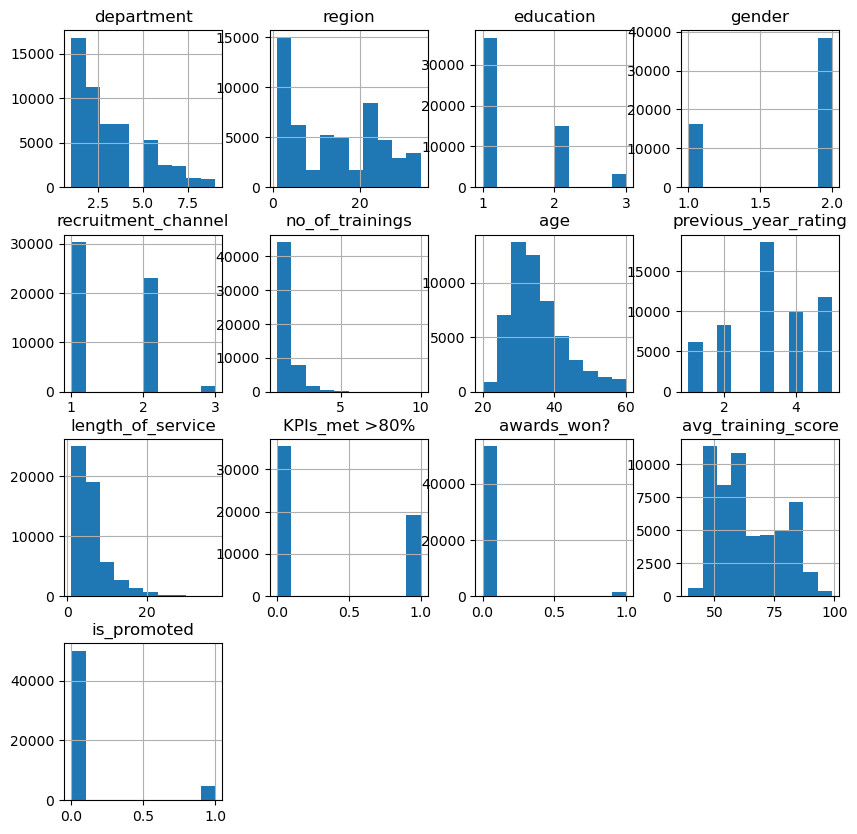

In [56]:
train.hist(figsize=(10,10))

In [ ]:
train.age.value_counts()

In [57]:
IQR1=train["age"].quantile(0.75)-train["age"].quantile(0.25)
IQR1

10.0

In [58]:
ub1=train.age.quantile(0.75)+3*IQR1
lb1=train.age.quantile(0.25)-3*IQR1
print(ub1,lb1)

69.0 -1.0


In [59]:
train.loc[train["age"]>69,"age"]=69

<Axes: xlabel='age', ylabel='Density'>

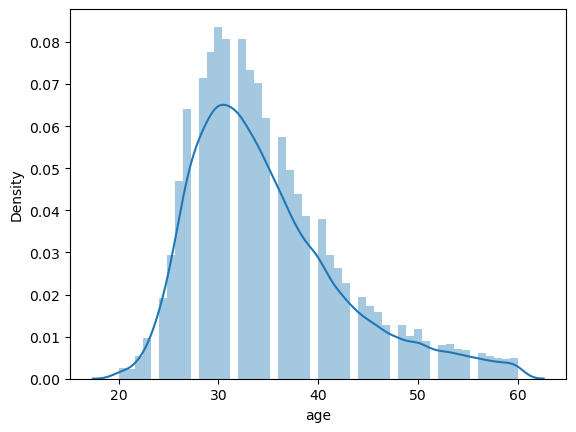

In [60]:
sns.distplot(train.age) 

In [61]:
train.skew()

department              0.964154
region                  0.208506
education               1.261161
gender                 -0.884275
recruitment_channel     0.537372
no_of_trainings         3.444288
age                     1.007044
previous_year_rating   -0.138304
length_of_service       1.738682
KPIs_met >80%           0.618966
awards_won?             6.331460
avg_training_score      0.450680
is_promoted             2.969307
dtype: float64

<Axes: >

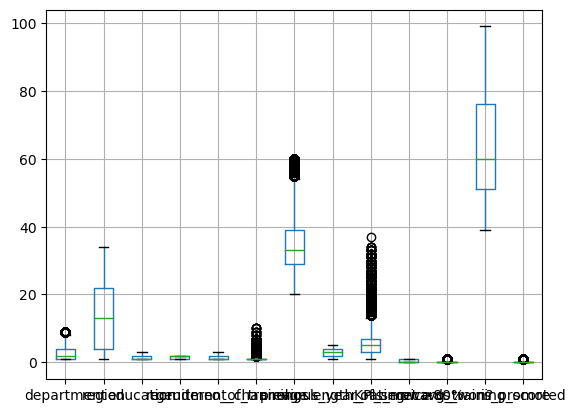

In [62]:
train.boxplot()

In [ ]:
train.age.value_counts()